In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
from salishsea_tools import evaltools as et, viz_tools
import os
import datetime as dt
import gsw
import matplotlib.gridspec as gridspec
import matplotlib as mpl
import matplotlib.dates as mdates
import cmocean as cmo
import scipy.interpolate as sinterp
import cmocean
import json
import f90nml
from collections import OrderedDict

fs=16
mpl.rc('xtick', labelsize=fs)
mpl.rc('ytick', labelsize=fs)
mpl.rc('legend', fontsize=fs)
mpl.rc('axes', titlesize=fs)
mpl.rc('axes', labelsize=fs)
mpl.rc('figure', titlesize=fs)
mpl.rc('font', size=fs)
mpl.rc('font', family='sans-serif', weight='normal', style='normal')

import warnings
#warnings.filterwarnings('ignore')
from IPython.display import Markdown, display

%matplotlib inline


## Import IOS Productivity data and create dataframe

In [2]:
df=pd.read_csv(r'/ocean/ksuchy/MOAD/observe/2023_SoG_ChitoStations_FLCData.csv')

In [3]:
df

,Cruise,Event,Sample Number,Date,Station,Depth (m),Lat,Long,Fo,GOPm (mmol O2 / m³ / h),JVPIIm (µmol photons / m³ / s),"Max. PhytoPP (using ɸe,c of 4;mmol C/m3/h )",Max. PhytoPP (using Redfield O:C; mmol C / m³ / h),aLHII,Daily Light Integral (mol photons / m2 / day),Total e- production (mol e- /m2/ day),Total C production (mmol C/ m2/day ),Total C production (g C /m2/day)
0,2023-002,2,2,16-Feb-23,GEO1,0,49.15041,-123.44933,1.0420,0.3557,0.3952,0.35568,0.273,0.012450,4.900,0.100,15.30,0.20
1,2023-002,21,22,17-Feb-23,12,5,49.43568,-124.40834,1.2140,0.6615,0.7350,0.66150,0.508,0.014930,8.700,0.100,32.40,0.40
2,2023-002,46,29,19-Feb-23,42,0,49.17230,-123.26200,1.0600,1.0430,1.1590,1.04310,0.801,0.019170,7.600,0.100,36.20,0.40
3,2023-003,12,5,15-Mar-23,42,0,49.17790,-123.26206,1.0900,1.4890,1.6550,1.48950,1.144,0.037700,19.200,0.700,180.60,2.20
4,2023-003,14,6,15-Mar-23,42,5,49.17590,-123.26213,1.1030,1.1830,1.3150,1.18350,0.909,0.011890,19.200,0.200,56.90,0.70
5,2023-003,23,13,16-Mar-23,GEO1,0,49.14987,-123.44994,1.4430,0.9798,1.0890,0.98010,0.753,0.014470,20.000,0.300,72.30,0.90
6,2023-003,25,14,16-Mar-23,GEO1,5,49.14983,-123.44966,1.3630,1.3410,1.4900,1.34100,1.030,0.015520,20.000,0.300,77.60,0.90
7,2023-003,37,28,17-Mar-23,12,0,49.43616,-124.40801,9.9520,33.6000,37.3300,33.59700,25.809,0.145800,14.600,2.100,532.50,6.40
8,2023-003,39,29,17-Mar-23,12,5,49.43610,-124.40819,12.7000,26.1000,29.0000,26.10000,20.048,0.199800,14.600,2.900,729.70,8.80
9,2023-020,1,1,11-Apr-23,GEO1,0,49.15003,-123.44947,2.6320,4.9370,5.4850,4.93650,3.792,0.042620,11.900,0.500,126.70,1.50


In [4]:
df.keys()

Index(['Cruise', 'Event', 'Sample Number', 'Date', 'Station', 'Depth (m)',
       'Lat', 'Long', 'Fo', 'GOPm (mmol O2 / m³ / h)',
       'JVPIIm (µmol photons / m³ / s)',
       'Max. PhytoPP (using ɸe,c of 4;mmol C/m3/h )',
       'Max. PhytoPP (using Redfield O:C; mmol C / m³ / h)', 'aLHII',
       'Daily Light Integral (mol photons / m2 / day)',
       'Total e- production (mol e- /m2/ day)',
       'Total C production (mmol C/ m2/day )',
       'Total C production (g C /m2/day)'],
      dtype='object')

In [5]:
df.rename(columns={'Long':'Lon'},inplace=True)

In [6]:
df['Total C production (g C /m2/day)']

0      0.20
1      0.40
2      0.40
3      2.20
4      0.70
5      0.90
6      0.90
7      6.40
8      8.80
9      1.50
10     1.10
11     2.00
12     0.50
13     9.30
14    16.30
15    13.60
16    11.80
17     9.00
18     3.80
19     1.40
20     3.80
21     1.00
22     1.60
23     1.80
24     2.60
25     0.90
26     1.90
27     2.50
28     3.50
29     4.00
30     1.40
31     5.50
32     2.90
33     2.50
34     2.70
35     4.50
36     1.60
37     4.60
38     2.30
39     1.74
40     1.00
41     0.61
42     2.75
43     3.53
44     2.83
45     1.05
46     3.26
47     1.95
48     0.21
49     0.40
50     0.65
51     0.71
52     1.10
53     1.16
54     1.06
55     0.20
56     0.74
57     0.73
58     0.66
59     0.51
Name: Total C production (g C /m2/day), dtype: float64

In [7]:
df['Station'].unique()

array(['GEO1', '12', '42'], dtype=object)

In [8]:
df['Date']

0     16-Feb-23
1     17-Feb-23
2     19-Feb-23
3     15-Mar-23
4     15-Mar-23
5     16-Mar-23
6     16-Mar-23
7     17-Mar-23
8     17-Mar-23
9     11-Apr-23
10    11-Apr-23
11    12-Apr-23
12    12-Apr-23
13    14-Apr-23
14    14-Apr-23
15    05-May-23
16    05-May-23
17    06-May-23
18    06-May-23
19    01-Jun-23
20    01-Jun-23
21    02-Jun-23
22    02-Jun-23
23    03-Jun-23
24    03-Jun-23
25    25-Jul-23
26    25-Jul-23
27    26-Jun-23
28    28-Jun-23
29    28-Jun-23
30    28-Jun-23
31    28-Jun-23
32    28-Jun-23
33    28-Jun-23
34    28-Jun-23
35    29-Jun-23
36    29-Jun-23
37    29-Jun-23
38    29-Jun-23
39    02-Sep-23
40    02-Sep-23
41    02-Sep-23
42    03-Sep-23
43    03-Sep-23
44    03-Sep-23
45    03-Sep-23
46    03-Sep-23
47    03-Sep-23
48    11-Oct-23
49    11-Oct-23
50    11-Oct-23
51    11-Oct-23
52    11-Oct-23
53    11-Oct-23
54    11-Oct-23
55    11-Oct-23
56    12-Oct-23
57    12-Oct-23
58    12-Oct-23
59    12-Oct-23
Name: Date, dtype: object

## Figure showing observation locations of IOS sampling

In [9]:
import netCDF4 as nc

In [10]:
cm1=cmocean.cm.thermal
with nc.Dataset('/data/eolson/results/MEOPAR/NEMO-forcing-new/grid/bathymetry_201702.nc') as bathy:
    bathylon=np.copy(bathy.variables['nav_lon'][:,:])
    bathylat=np.copy(bathy.variables['nav_lat'][:,:])
    bathyZ=np.copy(bathy.variables['Bathymetry'][:,:])

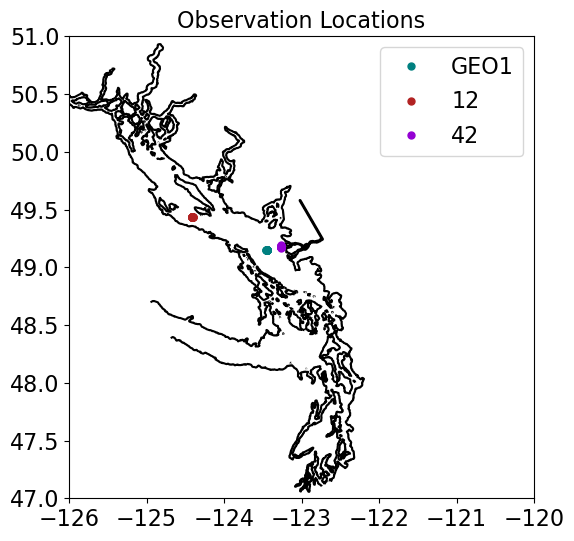

In [17]:


fig, ax = plt.subplots(1,1,figsize = (6,6))
with nc.Dataset('/ocean/ksuchy/MOAD/NEMO-forcing/grid/bathymetry_201702.nc') as grid:
    viz_tools.plot_coastline(ax, grid, coords = 'map',isobath=.1)
colors=('teal','firebrick','darkviolet','fuchsia',
        'royalblue','darkgoldenrod','mediumspringgreen','deepskyblue','lightblue','green','darkorange')
datreg=dict()
for ind, iregion in enumerate(df.Station.unique()):
    datreg[iregion] = df.loc[df.Station==iregion]
    ax.plot(datreg[iregion]['Lon'], datreg[iregion]['Lat'],'.',
            color = colors[ind], label=iregion,markersize=10)
ax.set_ylim(47,51)
ax.legend(bbox_to_anchor=[1,.6,0,0])
ax.set_xlim(-126, -120);
ax.set_title('Observation Locations');
ax.legend(bbox_to_anchor=(1, 1))


In [25]:
df['Date']=df['Date'].astype('string')

In [43]:
df['Date']=pd.to_datetime(df.Date, format='%d-%b-%y')

In [44]:
df['Month'] = df['Date'].dt.month

In [45]:
monthlymean=df.groupby(['Month']).mean()

In [47]:
monthlymean.keys()

Index(['Event', 'Sample Number', 'Depth (m)', 'Lat', 'Lon', 'Fo',
       'GOPm (mmol O2 / m³ / h)', 'JVPIIm (µmol photons / m³ / s)',
       'Max. PhytoPP (using ɸe,c of 4;mmol C/m3/h )',
       'Max. PhytoPP (using Redfield O:C; mmol C / m³ / h)', 'aLHII',
       'Daily Light Integral (mol photons / m2 / day)',
       'Total e- production (mol e- /m2/ day)',
       'Total C production (mmol C/ m2/day )',
       'Total C production (g C /m2/day)'],
      dtype='object')

In [46]:
monthlysem=df.groupby(['Month']).sem()

In [78]:
GEO1=df.loc[(df.Station=='GEO1')]
STN12=df.loc[(df.Station=='12')]
STN42=df.loc[(df.Station=='42')]

In [79]:
monthlymeanGEO1=GEO1.groupby(['Month']).mean()
monthlymeanSTN12=STN12.groupby(['Month']).mean()
monthlymeanSTN42=STN42.groupby(['Month']).mean()

In [80]:
monthlysemGEO1=GEO1.groupby(['Month']).sem()
monthlysemSTN12=STN12.groupby(['Month']).sem()
monthlysemSTN42=STN42.groupby(['Month']).sem()

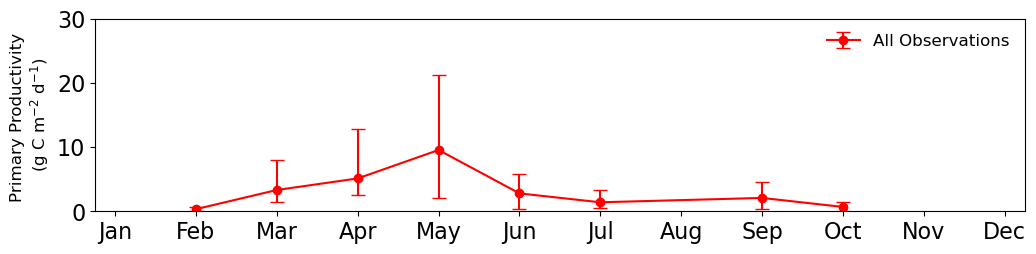

In [91]:
fig,ax=plt.subplots(1,1,figsize=(12,2.5))
ax.set_xticks(np.arange(1,13,1))
ax.set_xticklabels(['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']) #where you replace axs[0] with whatever your axis is named


ax.errorbar(monthlymean.index,((monthlymean['Total C production (g C /m2/day)'])),
               yerr=(np.array([(monthlymean['Total C production (g C /m2/day)']-monthlysem['Total C production (g C /m2/day)']),
                 (monthlymean['Total C production (g C /m2/day)']+monthlysem['Total C production (g C /m2/day)'])])),
              fmt='r-o',capsize=5,color='blue',label='All Observations')


ax.set_ylim(0,30)
ax.set_xlim(0.75,12.25)
ax.set_title('')
ax.set_ylabel('Primary Productivity \n(g C m$^{-2}$ d$^{-1}$)',fontsize=12)
ax.legend(fontsize=12,frameon=False,bbox_to_anchor=(1., 1.0))
#fig.savefig('.png',bbox_inches='tight')

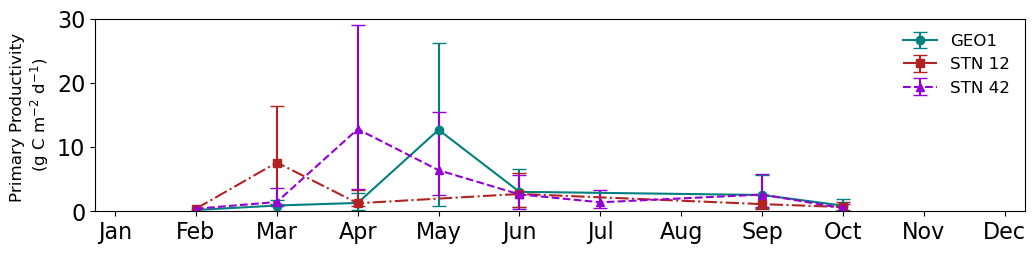

In [90]:
fig,ax=plt.subplots(1,1,figsize=(12,2.5))
ax.set_xticks(np.arange(1,13,1))
ax.set_xticklabels(['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']) #where you replace axs[0] with whatever your axis is named



ax.errorbar(monthlymeanGEO1.index,((monthlymeanGEO1['Total C production (g C /m2/day)'])),
               yerr=(np.array([(monthlymeanGEO1['Total C production (g C /m2/day)']-monthlysemGEO1['Total C production (g C /m2/day)']),
                 (monthlymeanGEO1['Total C production (g C /m2/day)']+monthlysemGEO1['Total C production (g C /m2/day)'])])),
              capsize=5,color='teal',linestyle='-',marker='o',label='GEO1')

ax.errorbar(monthlymeanSTN12.index,((monthlymeanSTN12['Total C production (g C /m2/day)'])),
               yerr=(np.array([(monthlymeanSTN12['Total C production (g C /m2/day)']-monthlysemSTN12['Total C production (g C /m2/day)']),
                 (monthlymeanSTN12['Total C production (g C /m2/day)']+monthlysemSTN12['Total C production (g C /m2/day)'])])),
              capsize=5,color='firebrick',linestyle='-.',marker='s',label='STN 12')

ax.errorbar(monthlymeanSTN42.index,((monthlymeanSTN42['Total C production (g C /m2/day)'])),
               yerr=(np.array([(monthlymeanSTN42['Total C production (g C /m2/day)']-monthlysemSTN42['Total C production (g C /m2/day)']),
                 (monthlymeanSTN42['Total C production (g C /m2/day)']+monthlysemSTN42['Total C production (g C /m2/day)'])])),
             capsize=5,color='darkviolet',linestyle='--',marker='^',label='STN 42')



ax.set_ylim(0,30)
ax.set_xlim(0.75,12.25)
ax.set_title('')
ax.set_ylabel('Primary Productivity \n(g C m$^{-2}$ d$^{-1}$)',fontsize=12)
ax.legend(fontsize=12,frameon=False,bbox_to_anchor=(1., 1.0))
#fig.savefig('.png',bbox_inches='tight')